### Week-1 assignment: Machine Learning & Data Mining 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# Load dataset

ibm = pd.read_csv('./floor/IBM.txt', delimiter = " ")
print(ibm.head(10))

         Date        Open        High        Low       Close    Volume  \
0  2007-01-03   97.180000   98.400002  96.260002   97.269997   9196800   
1  2007-01-04   97.250000   98.790001  96.879997   98.309998  10524500   
2  2007-01-05   97.599998   97.949997  96.910004   97.419998   7221300   
3  2007-01-08   98.500000   99.500000  98.349998   98.900002  10340000   
4  2007-01-09   99.080002  100.330002  99.070000  100.070000  11108200   
5  2007-01-10   98.500000   99.050003  97.930000   98.889999   8744800   
6  2007-01-11   99.000000   99.900002  98.500000   98.650002   8000700   
7  2007-01-12   98.989998   99.690002  98.500000   99.339996   6636500   
8  2007-01-16   99.400002  100.839996  99.300003  100.820000   9602200   
9  2007-01-17  100.690002  100.900002  99.900002  100.019997   8200700   

    Adjusted  
0  63.127567  
1  63.802544  
2  63.224930  
3  64.185463  
4  64.944771  
5  64.178978  
6  64.023201  
7  64.471024  
8  65.431503  
9  64.912323  


In [9]:
# Summarization of given data

ibm.describe()   

,Open,High,Low,Close,Volume,Adjusted
count,3692.000000,3692.000000,3692.000000,3692.000000,3.692000e+03,3692.000000
mean,147.198976,148.403180,146.074512,147.269085,5.576247e+06,113.375997
std,30.808862,30.780935,30.844083,30.796603,3.229710e+06,25.410689
min,72.739998,76.980003,69.500000,71.739998,1.027500e+06,48.040176
25%,124.189999,125.349998,123.072502,124.332496,3.482300e+06,90.296511
50%,144.750000,145.619995,143.830002,144.730003,4.653750e+06,120.980629
75%,168.847500,170.442501,167.659996,169.169998,6.660725e+06,132.155647
max,215.380005,215.899994,214.300003,215.800003,3.806350e+07,155.979538


##### Q1: Data quality

            Date        Open        High         Low       Close    Volume  \
3538  2021-01-22  120.699997  120.699997  117.360001  118.610001  38063500   
106   2007-06-06  105.500000  105.510002  102.389999  102.410004  30770700   
2718  2017-10-18  157.119995  161.229996  156.949997  159.529999  30490200   
11    2007-01-19   95.000000   96.849998   94.550003   96.169998  26035800   
3466  2020-10-08  130.860001  135.500000  129.770004  131.490005  25288900   

        Adjusted  
3538  114.435143  
106    66.923210  
2718  132.191544  
11     62.413712  
3466  125.048523  


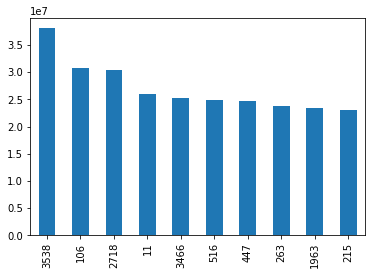

In [10]:
# data set Volume

sorted_by_volume = ibm.sort_values(['Volume'], ascending = False)
print(sorted_by_volume.head(5))
sorted_by_volume['Volume'].head(10).plot(kind = 'bar')
plt.show()

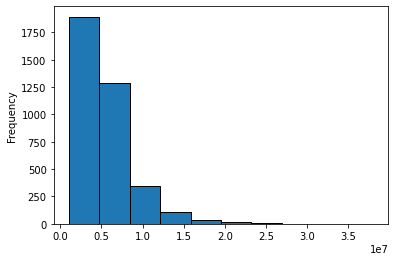

In [11]:
ibm['Volume'].plot(kind = "hist", edgecolor = "black")
plt.show()

c:\users\veda\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

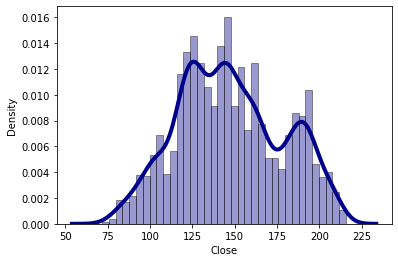

In [12]:
# Degree of variation

sns.distplot(ibm['Close'], hist = True, kde=True, bins=int(180/5),color='darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4})

In [13]:
# Daily returns, and Difference of high and low

ibm['returns'] = (ibm['Close'] - ibm['Close'].shift())/ibm['Close'].shift()
ibm['HighLow'] = (ibm['High']-ibm['Low'])
print(ibm.head(10))

         Date        Open        High        Low       Close    Volume  \
0  2007-01-03   97.180000   98.400002  96.260002   97.269997   9196800   
1  2007-01-04   97.250000   98.790001  96.879997   98.309998  10524500   
2  2007-01-05   97.599998   97.949997  96.910004   97.419998   7221300   
3  2007-01-08   98.500000   99.500000  98.349998   98.900002  10340000   
4  2007-01-09   99.080002  100.330002  99.070000  100.070000  11108200   
5  2007-01-10   98.500000   99.050003  97.930000   98.889999   8744800   
6  2007-01-11   99.000000   99.900002  98.500000   98.650002   8000700   
7  2007-01-12   98.989998   99.690002  98.500000   99.339996   6636500   
8  2007-01-16   99.400002  100.839996  99.300003  100.820000   9602200   
9  2007-01-17  100.690002  100.900002  99.900002  100.019997   8200700   

    Adjusted   returns   HighLow  
0  63.127567       NaN  2.140000  
1  63.802544  0.010692  1.910004  
2  63.224930 -0.009053  1.039993  
3  64.185463  0.015192  1.150002  
4  64.9447

#### If you have some knowledge in probability and/or statistics, can you propose a model for the distribution of the closing price of your data and the daily return?